<a href="https://colab.research.google.com/github/Jitha50/House-Price-Prediction/blob/main/Decision_Tree_Irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [45]:
from ast import increment_lineno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'white', color_codes = True)

In [46]:
# Data collection
data = pd.read_csv('/content/drive/MyDrive/iris.csv')

In [47]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [49]:
data['species'].unique()
# There are 3 target varaibles present which is a ctaegorical in terms

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
print("Deimession of the dataset", data.shape)
# you will get out put as 150 rows and 5 columns.
print('number of rows in the dataset', data.shape[0])
# this will give us the total number of rows in our datatset
print('Number of coulumns in the datatset', data.shape[1])
#It will help us to get the number of columns in our dataset

Deimession of the dataset (150, 5)
number of rows in the dataset 150
Number of coulumns in the datatset 5


In [51]:
# EDA -> Exploratory Data analysis
# we have to find the information about the datat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


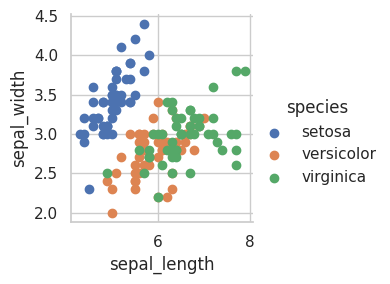

In [52]:
# we plot a 2-D scatter plot by usinf seaborn library
sns.set_style("whitegrid");
sns.FacetGrid(data, hue = "species")\
    .map(plt.scatter, "sepal_length","sepal_width")\
    .add_legend();
plt.show()

# Notice that the blue points can be easily sepearated
# from orange and grenn by drawing a line is not seperbale
# simlary we can draw multiple 2-D scatter plots for each combination of features so total combination  = 4ce2 = 4



#### Observation
- Using sepal_length and sepal_width features, we can distinguish setosa flowers from others.<br>
-Seperating versicolor from verginica is much harder as they have cosniderable overlap.<br><br><br><br>



#### Parilplot o the Data

pair plot makes high-level scatter plots to capture relationship between multiple varaibles within a dataframe.
Dis-Advantage
-> can be usd when number of features are high.
-> Cannot visualize higher dimesnional pattern in 3D and 4D
-> Only possible to view 2D patterns




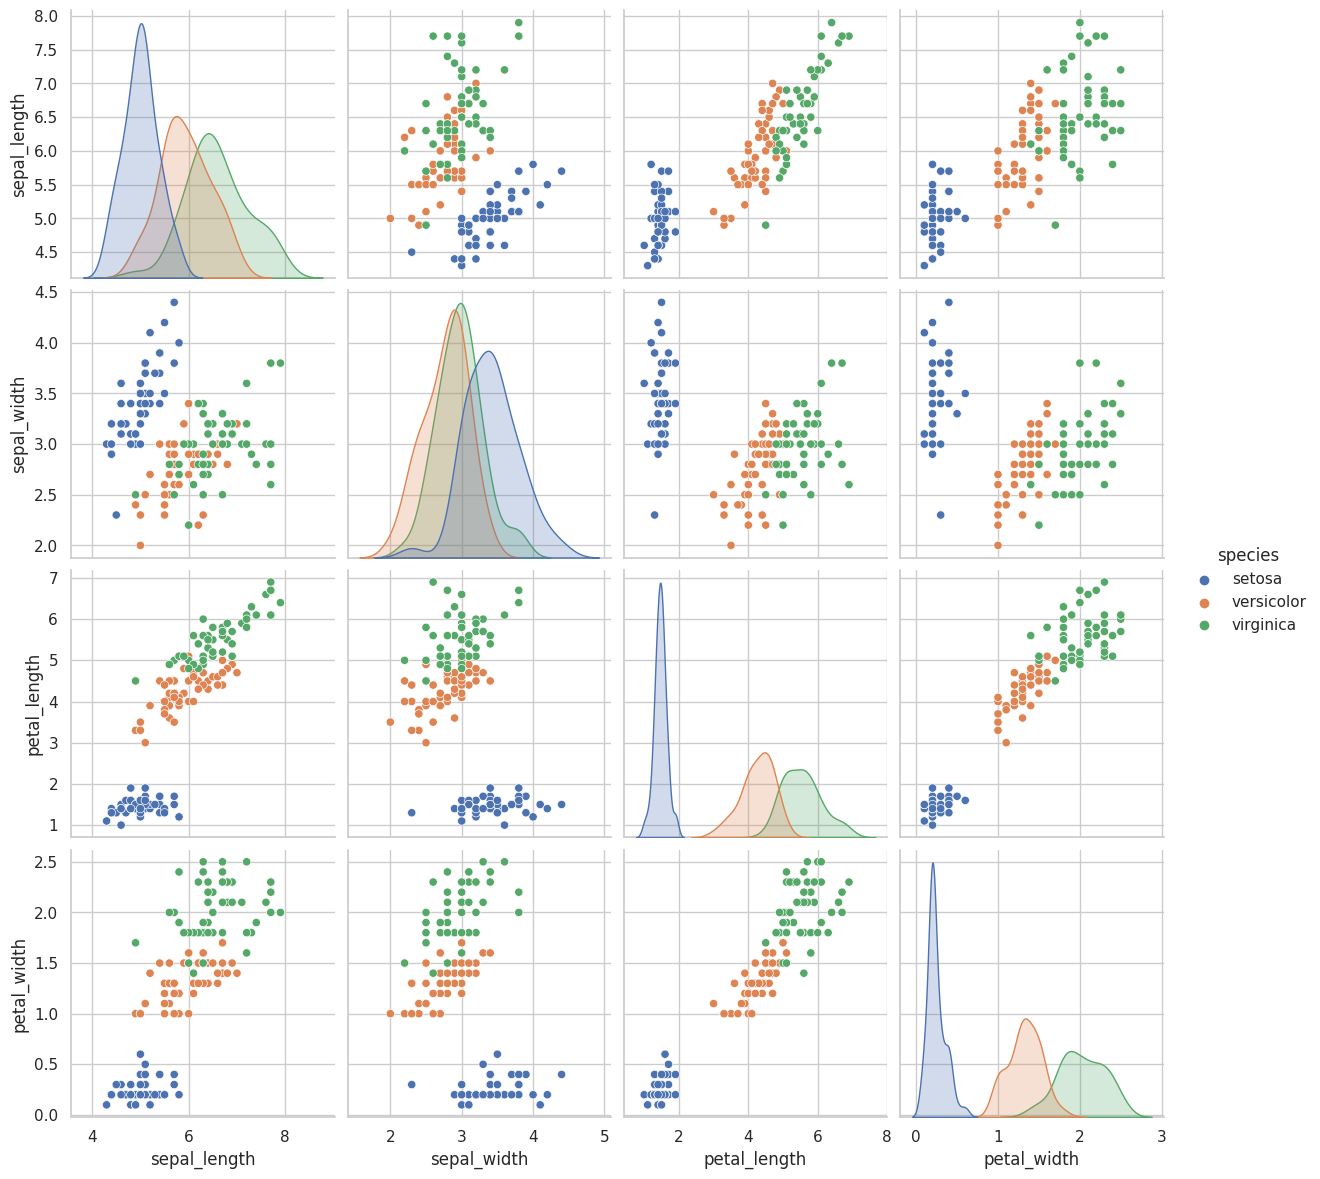

In [53]:
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'species', size = 3)
plt.show()

### Observation
- Petal_length and petal_width are the most useful features to identify various flowers types.<br>
- While setos can be easily identified(linearly sepearable), virnica and versicolor have some overlap(almost linearly seperable)<br>
- We can find the "lines" and "if-else" codition to build a simple model to classify the flowers types.<br><br><br><br>


#### Univariate Analysis using PDF
we have 4 variables sepal length, petal length sepal width and petal width.


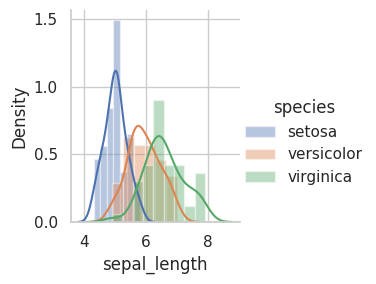

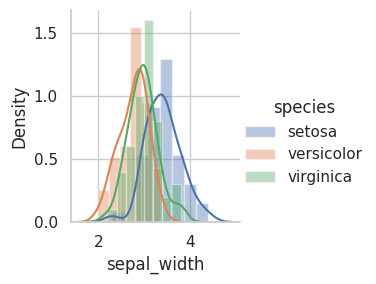

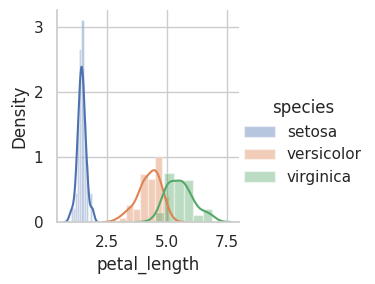

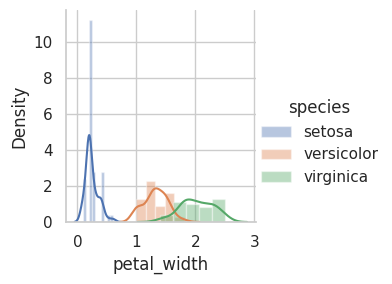

In [54]:
for name in data.columns.values[:-1]:
  sns.FacetGrid(data, hue = "species").map(sns.distplot, name).add_legend()
plt.show()

### Observation
-  For sepal_width :  We cna see viirginice and versicolor are fully overlapped
- For sepal_length : we can't seprate any class because all of them are overlapped. From observation saple length is worst than petal length and patel width.
- As we compare petal length and petal width the petal length the sestosa are bteer seprable than using petal length. There is overlap between vericolor and verginica .

<Axes: >

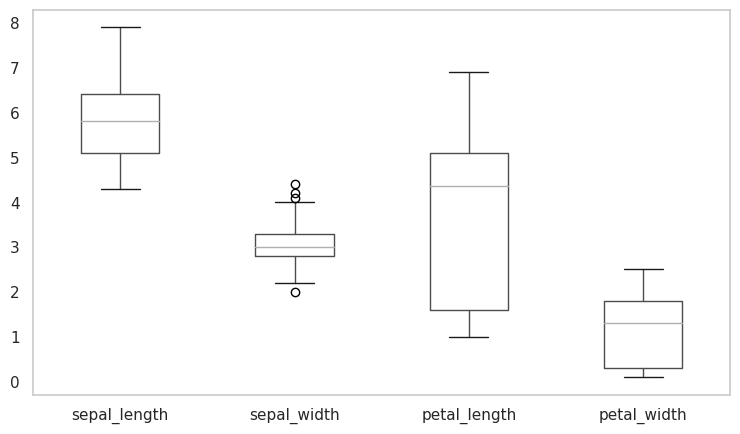

In [55]:
'''
box - > It will help us to diplay five number summar  the minimum fence, first quartile, median, thrid quartile and maximum.


The box plot we draw a box from the 1st quartile to the 3 rd quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the miniu=mum or to maximum.


'''
# we plot a box plot
data.boxplot(column = ['sepal_length','sepal_width','petal_length','petal_width'], figsize = (9,5), grid = False)

In [56]:
# Identifying missing values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [57]:
data_ct = data.select_dtypes(include = 'object')
data_ct

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [58]:
# only numerical data type
data_num = data.select_dtypes(include = ['float','int64'])
data_num.head(15)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [59]:
# we count the value/ numbers for each species
data.species.value_counts()
# value_count()-> it is a function whihc helps us to count the numbers

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species Distribution')

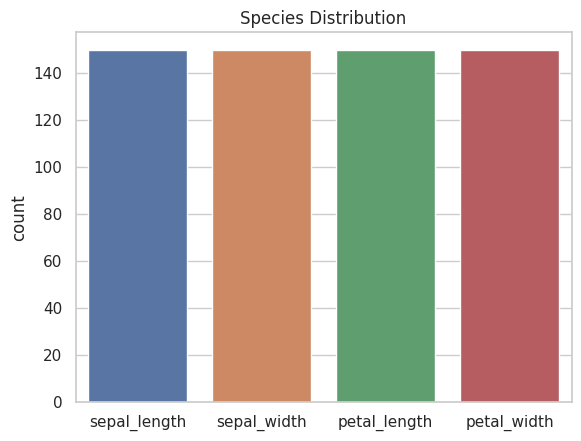

In [60]:
# We try to plot each and every value on a bar graph
sns.countplot(data = data)
plt.title("Species Distribution")

In [61]:
# We have our target varaible in categories we have to convert those target catergorical values into numeric . Beacuse we know that
# ML works well with numerical data.
# labelencoder()-> helps you to convert your categorica data into 0,1,2 form based on the number of categories you have.
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
# in this dataset we have only one categorical column that is "Species"

In [62]:
data['species'] = label_encode.fit_transform(data['species'])

In [63]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [64]:
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [65]:
# Check unique  values of species
data['species'].unique()

array([0, 1, 2])

In [66]:
# we will plot a corr()-> it will help us to find the relation between independent and dependent variabels
data_corr = data.corr()


<Axes: >

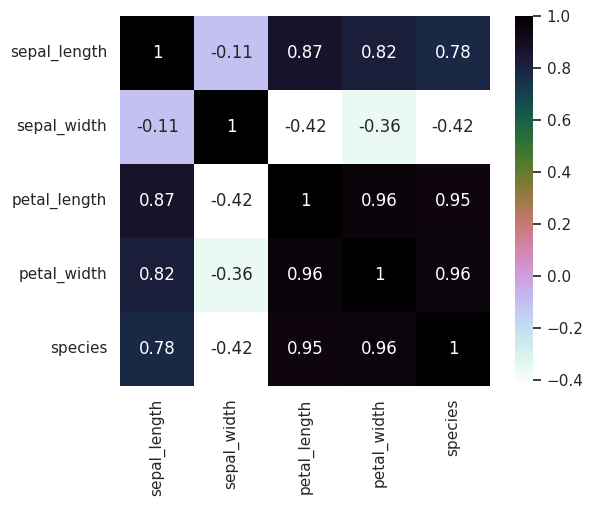

In [67]:
sns.heatmap(data_corr, annot = True , cmap = 'cubehelix_r', square = True)

In [68]:
# we will split the the data into 2 parts train and test/validation sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.30)
print(train.shape, test.shape)

(105, 5) (45, 5)


In [69]:
# we condering only highly correlated features fir training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']

test_x = test.drop(['species'], axis = 1)
test_y = test['species']

In [70]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [71]:
# W ehave to implememtn our ML model on this data
# that is DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0, max_depth = 3, criterion = 'gini')
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [72]:
# Predict species for test data
pred = clf.predict(test_x)
pred

array([0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0,
       0])

In [73]:
# what willbe the accuracy of this model
from sklearn.metrics import accuracy_score
print('The Accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred, test_y)*100,2)))

The Accuracy of the Decision Tree is 93.33%


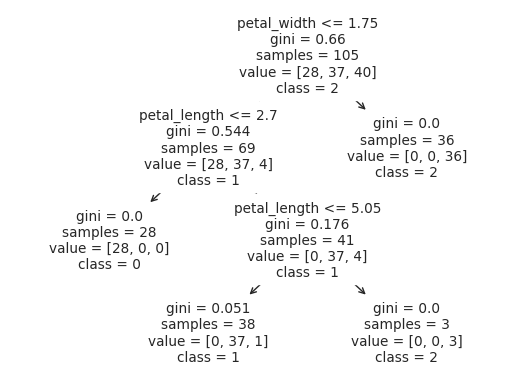

In [74]:
from sklearn import tree
tree.plot_tree(clf,feature_names = ['sepal_length','sepal_width','petal_length','petal_width'], class_names = ['0','1','2'], proportion = False)
plt.show()

In [79]:
from sklearn.tree import DecisionTreeClassifier

clf_1 = DecisionTreeClassifier(random_state = 0, max_depth = 3, criterion = 'entropy')
clf_1.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [81]:
# Prediting the pecies
pred_1 = clf_1.predict(test_x)
pred_1

array([0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0,
       0])

In [82]:
# we will check the validation accuracy
from sklearn.metrics import accuracy_score
print("The accuracy of the Decision Tree is {}%".format(round(accuracy_score(pred_1,test_y)*100,2)))

The accuracy of the Decision Tree is 93.33%


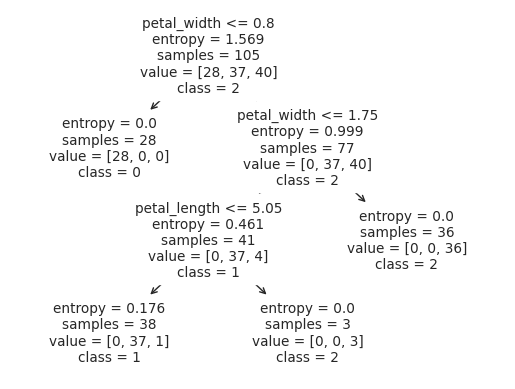

In [83]:
# from sklearn
from sklearn import tree
tree.plot_tree(clf_1,feature_names = ['sepal_length','sepal_width','petal_length','petal_width'], class_names = ['0','1','2'], proportion = False)
plt.show()

In [85]:
# model visulaization
from sklearn.tree import export_text
r = export_text(clf_1, feature_names = ['sepal_lenght', 'sepal_width','petal_length_length','petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length_length <= 5.05
|   |   |   |--- class: 1
|   |   |--- petal_length_length >  5.05
|   |   |   |--- class: 2
|   |--- petal_width >  1.75
|   |   |--- class: 2

